In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np


In [2]:
df= pd.read_csv("train_LCP.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
feature_cols=df.columns

In [6]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [7]:
for cols in feature_cols:
    
    print(df[cols].value_counts())
    

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: L

In [8]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:

df= df.dropna()
df.reset_index(drop=True, inplace=True)
df.isnull().sum()*100/df.shape[0]

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [11]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']
cat_cols= ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History','Property_Area']

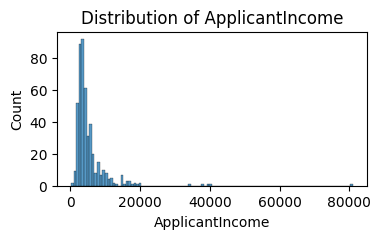

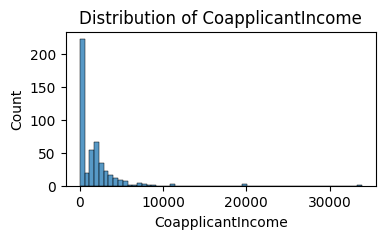

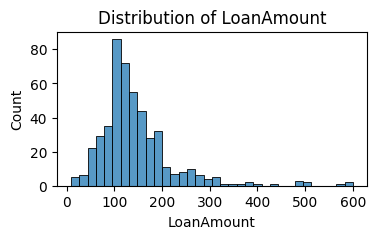

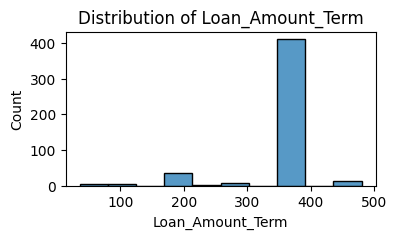

In [13]:
# lets see the distribution of Data
import seaborn as sns

for cols in num_cols:
    plt.figure(figsize=(4,2))
    sns.histplot(df[cols])
    plt.title(f"Distribution of {cols}")
    plt.show()

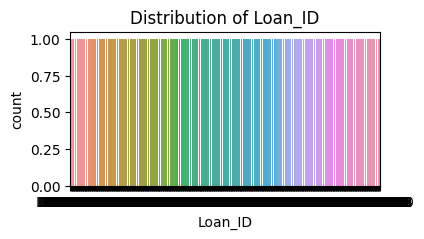

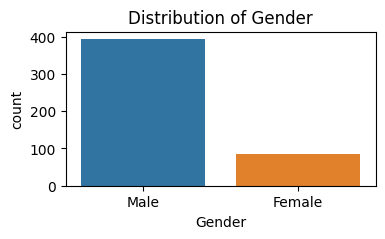

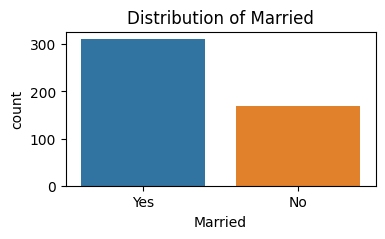

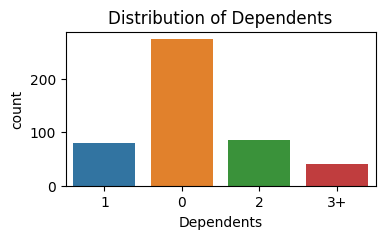

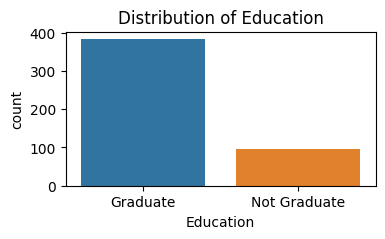

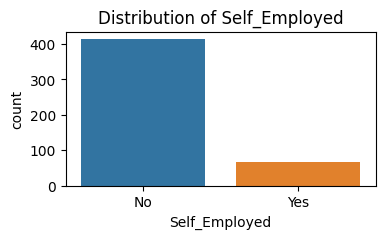

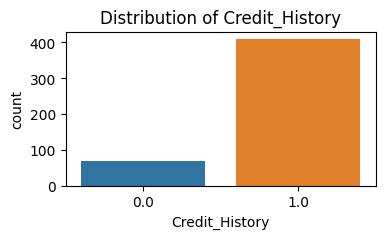

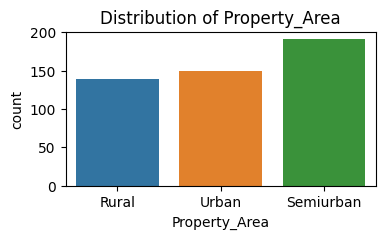

In [14]:
for cols in cat_cols:
    plt.figure(figsize=(4,2))
    sns.countplot(data=df , x=cols)
    plt.title(f"Distribution of {cols}")
    plt.show()

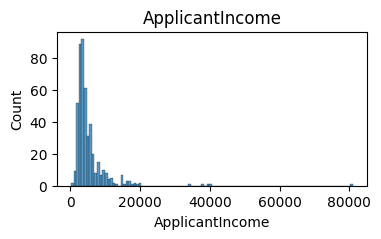

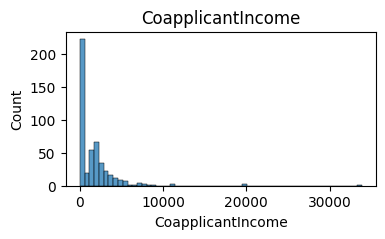

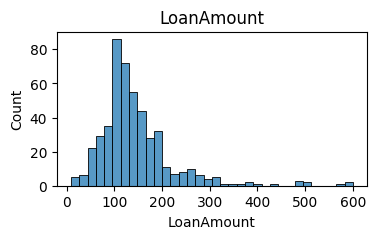

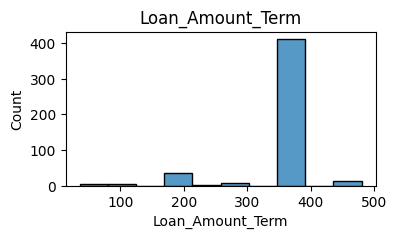

In [15]:
n_rows=1
n_cols = len(num_cols)

for col in num_cols:
    plt.figure(figsize=(4,2))
    sns.histplot(df[col])
    plt.title(f'{col}')
    plt.show()


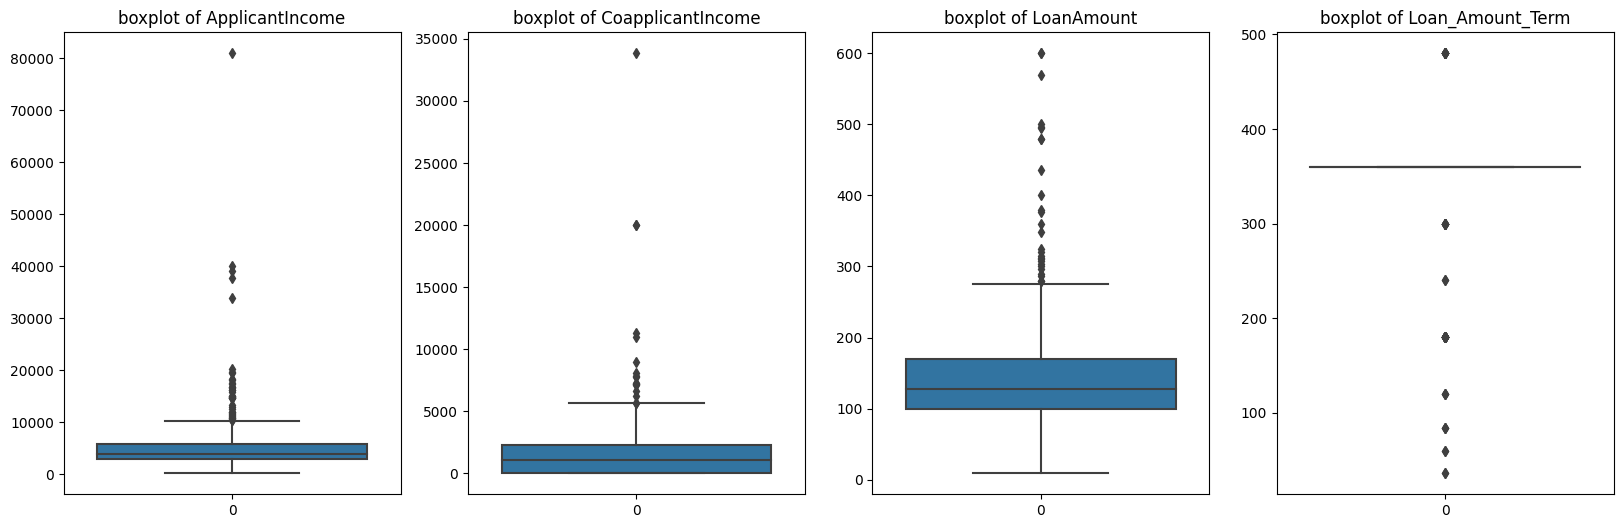

In [16]:
n_rows =1
n_cols =len(num_cols)

fig,axis = plt.subplots(n_rows , n_cols ,figsize=(20,6*n_rows))

for i ,col in enumerate(num_cols):
    sns.boxplot(df[col] , ax =axis[i])
    axis[i].set_title(f'boxplot of {col}')

In [17]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [18]:
# from sklearn.preprocessing import OrdinalEncoder
# oe = OrdinalEncoder()
# pd.options.mode.chained_assignment = None  # default='warn'



# df['Loan_ID'] = oe.fit_transform(df[['Loan_ID']])
# df['Gender']= oe.fit_transform(df[['Gender']])
# df['Married']= oe.fit_transform(df[['Married']])
# df['Dependents']= oe.fit_transform(df[['Dependents']])
# df['Education']= oe.fit_transform(df[['Education']])
# df['Self_Employed']= oe.fit_transform(df[['Self_Employed']])
# df['Property_Area']= oe.fit_transform(df[['Property_Area']])
# # df['Loan_Status']= oe.fit_transform(df[['Loan_Status']])

In [19]:


# df.columns

In [20]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression

# df =df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Credit_History', 'Loan_Status']]    # credit_history makes accuracy score better then property_area 
# df

In [21]:
# clf = LogisticRegression()

# X = df.drop(columns=['Loan_Status'])
# y= df['Loan_Status']

# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

# X_train.head()

# clf


In [22]:
# clf=clf.fit(X_train,y_train)
# clf


In [23]:
# y_pred =clf.predict(X_test)

# score= accuracy_score(y_test,y_pred)
# score

# df.columns
# target=['Y','N']
# score

In [24]:
# y_pred

In [25]:
# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# rf_clf = RandomForestClassifier(n_estimators=100,random_state=38)
# rf_clf.fit(X_train,y_train)




In [26]:
# df.columns

In [27]:
# n_trees = 3
# for i in range(min(n_trees,len(rf_clf.estimators_))):
#     plt.figure(figsize=(20,10))
#     plot_tree(rf_clf.estimators_[i],filled=True,feature_names=['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], class_names=target)
#     plt.title(f'Tree{i+1}')

In [28]:
# from sklearn.model_selection import cross_val_score
# score = cross_val_score(rf_clf, X , y , cv= 10)
# print('cross-val score = ',score)
# print('\naverage cross-val score = ',score.mean())

In [29]:
num_cols


['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [30]:
# chechking for outlier

outliers_count ={}

for col in num_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    
    IQR=Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    
    outliers= df[(df[col]<lower_bound) | (df[col]>upper_bound)]
    outliers_count[col]= outliers.shape[0]
  
outliers_count  
    
    
    
    

{'ApplicantIncome': 40,
 'CoapplicantIncome': 17,
 'LoanAmount': 27,
 'Loan_Amount_Term': 69}

In [31]:
#replace 


outliers_count={}


for col in num_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    
    
    IQR=Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    
    #cap the outliers
    df[col]= df[col].apply(lambda x: upper_bound if x >upper_bound else x)
    df[col] =df[col].apply(lambda x :lower_bound if x<lower_bound else x)
    
    

C:\Users\Stuti\AppData\Local\Temp\ipykernel_4300\1526059519.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]= df[col].apply(lambda x: upper_bound if x >upper_bound else x)
C:\Users\Stuti\AppData\Local\Temp\ipykernel_4300\1526059519.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] =df[col].apply(lambda x :lower_bound if x<lower_bound else x)
C:\Users\Stuti\AppData\Local\Temp\ipykernel_4300\1526059519.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [32]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [33]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]=scaler.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']])

C:\Users\Stuti\AppData\Local\Temp\ipykernel_4300\1633954372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]=scaler.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']])


In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,-0.041297,0.065461,-0.176430,0.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,-0.669225,-0.864277,-1.224239,0.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,-0.834636,0.589517,-0.311631,0.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,0.520783,-0.864277,0.043271,0.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,0.289525,1.722712,2.172689,0.0,1.0,Urban,Y


In [35]:
#label encoding

label_col = [ 'Gender' , 'Married' , 'Education','Self_Employed' , 'Loan_Status']

for col in label_col:
    df[col]=df[col].astype('category').cat.codes

C:\Users\Stuti\AppData\Local\Temp\ipykernel_4300\3526030012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].astype('category').cat.codes
C:\Users\Stuti\AppData\Local\Temp\ipykernel_4300\3526030012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].astype('category').cat.codes
C:\Users\Stuti\AppData\Local\Temp\ipykernel_4300\3526030012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [36]:
#one hot encoding
df=pd.get_dummies(df,columns=['Dependents','Property_Area'] , drop_first=True)
df

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,LP001003,1,1,0,0,-0.041297,0.065461,-0.176430,0.0,1.0,0,1,0,0,0,0
1,LP001005,1,1,0,1,-0.669225,-0.864277,-1.224239,0.0,1.0,1,0,0,0,0,1
2,LP001006,1,1,1,0,-0.834636,0.589517,-0.311631,0.0,1.0,1,0,0,0,0,1
3,LP001008,1,0,0,0,0.520783,-0.864277,0.043271,0.0,1.0,1,0,0,0,0,1
4,LP001011,1,1,0,1,0.289525,1.722712,2.172689,0.0,1.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP002978,0,0,0,0,-0.708892,-0.864277,-1.139738,0.0,1.0,1,0,0,0,0,0
476,LP002979,1,1,0,0,-0.230509,-0.864277,-1.663642,0.0,1.0,1,0,0,1,0,0
477,LP002983,1,1,0,0,1.342681,-0.716308,1.936087,0.0,1.0,1,1,0,0,0,1
478,LP002984,1,1,0,0,1.148710,-0.864277,0.820678,0.0,1.0,1,0,1,0,0,1


In [37]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,-0.041297,0.065461,-0.176430,0.0,1.0,0,1,0,0,0,0
1,1,1,0,1,-0.669225,-0.864277,-1.224239,0.0,1.0,1,0,0,0,0,1
2,1,1,1,0,-0.834636,0.589517,-0.311631,0.0,1.0,1,0,0,0,0,1
3,1,0,0,0,0.520783,-0.864277,0.043271,0.0,1.0,1,0,0,0,0,1
4,1,1,0,1,0.289525,1.722712,2.172689,0.0,1.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,-0.708892,-0.864277,-1.139738,0.0,1.0,1,0,0,0,0,0
476,1,1,0,0,-0.230509,-0.864277,-1.663642,0.0,1.0,1,0,0,1,0,0
477,1,1,0,0,1.342681,-0.716308,1.936087,0.0,1.0,1,1,0,0,0,1
478,1,1,0,0,1.148710,-0.864277,0.820678,0.0,1.0,1,0,1,0,0,1


In [38]:
df


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,-0.041297,0.065461,-0.176430,0.0,1.0,0,1,0,0,0,0
1,1,1,0,1,-0.669225,-0.864277,-1.224239,0.0,1.0,1,0,0,0,0,1
2,1,1,1,0,-0.834636,0.589517,-0.311631,0.0,1.0,1,0,0,0,0,1
3,1,0,0,0,0.520783,-0.864277,0.043271,0.0,1.0,1,0,0,0,0,1
4,1,1,0,1,0.289525,1.722712,2.172689,0.0,1.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,-0.708892,-0.864277,-1.139738,0.0,1.0,1,0,0,0,0,0
476,1,1,0,0,-0.230509,-0.864277,-1.663642,0.0,1.0,1,0,0,1,0,0
477,1,1,0,0,1.342681,-0.716308,1.936087,0.0,1.0,1,1,0,0,0,1
478,1,1,0,0,1.148710,-0.864277,0.820678,0.0,1.0,1,0,1,0,0,1


In [39]:
from sklearn.model_selection import train_test_split
X = df.drop('Loan_Status' , axis=1)
y = df['Loan_Status']
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=30)

In [40]:
#balancing the data
from imblearn.over_sampling import SMOTE
print('before  SMOTE', y_train.value_counts())
sm =SMOTE(random_state=54)
X_res,y_res = sm.fit_resample(X,y)
print('after SMOTE' , y_res.value_counts())


before  SMOTE 1    240
0     96
Name: Loan_Status, dtype: int64
after SMOTE 0    332
1    332
Name: Loan_Status, dtype: int64


# Model Training

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import GridSearchCV



In [42]:
parameters = {
    "C" :[0.001,0.01,0.1,1,10],
    'penalty' :['l1','l2']
}
grid=  GridSearchCV(LogisticRegression(solver="liblinear"),param_grid=parameters,cv=5)
grid.fit(X_res,y_res)
print("best parameters : -",grid.best_params_)

best parameters : - {'C': 10, 'penalty': 'l1'}


In [43]:
LR = LogisticRegression(C = 10,penalty= 'l2')
LR.fit(X_res,y_res)


LogisticRegression(C=10)

In [44]:
y_pred= LR.predict(X_test)
print("classification_report : - \n" , classification_report(y_test,y_pred))
print("Confusion Matrix : - \n" ,confusion_matrix(y_test,y_pred))

classification_report : - 
               precision    recall  f1-score   support

           0       0.67      0.63      0.65        52
           1       0.80      0.83      0.81        92

    accuracy                           0.76       144
   macro avg       0.74      0.73      0.73       144
weighted avg       0.75      0.76      0.76       144

Confusion Matrix : - 
 [[33 19]
 [16 76]]


# Random Forest

In [45]:


from  sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators' : [50,100 ,150],
              'criterion' : ['gini','entropy'],
              'max_depth' : [20,50,30]}
grid = GridSearchCV(RandomForestClassifier(), param_grid=parameters,cv=5)
grid.fit(X_res,y_res)
print("best parameter : - "), grid.best_params_

best parameter : - 


(None, {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 150})

In [46]:
RF = RandomForestClassifier(n_estimators=150 , criterion ='gini', max_depth =50)
RF.fit(X_res,y_res)


RandomForestClassifier(max_depth=50, n_estimators=150)

In [47]:
y_pred= RF.predict(X_test)
print("classification_report : - \n" , classification_report(y_test,y_pred))
print("Confusion Matrix : - \n" ,confusion_matrix(y_test,y_pred))

classification_report : - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        92

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Confusion Matrix : - 
 [[52  0]
 [ 0 92]]


# Export Model

In [48]:
import pickle

In [49]:
with open('randomforest_model.pkl','wb') as model_file:
    pickle.dump(RF, model_file)
    # loaded_model = pickle.load(model_file)
    

In [50]:
with open('randomforest_model.pkl','rb') as model_file:
    # pickle.dump(RF, model_file)
    loaded_model = pickle.load(model_file)

In [51]:
y_sample_pred= loaded_model.predict(X_test)